In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.metrics import mean_squared_error

In [ ]:
def polynomial_function(x):
    return 2*x**3 - 5*x**2 + 3*x - 1

def harmonic_function(x):
    return np.sin(2*x) + 0.5*np.cos(5*x)

def logarithmic_function(x):
    return np.log(x + 2) + 0.5*x

In [ ]:
def generate_noisy_data(func, x_range, num_points, noise_level=0.1):
    # Generování x-ových hodnot
    x = np.linspace(x_range[0], x_range[1], num_points)

    # Výpočet hodnot funkce
    y_true = func(x)

    # Přidání šumu
    noise = np.random.normal(0, noise_level, num_points)
    y_noisy = y_true + noise

    # Výběr náhodných bodů (50% všech bodů)
    indices = np.sort(np.random.choice(num_points, num_points // 2, replace=False))

    return x, y_true, x[indices], y_noisy[indices]

In [ ]:
def evaluate_interpolation(x_true, y_true, x_sample, y_sample, method, label):
    if method == 'linear':
        interp_func = interpolate.interp1d(x_sample, y_sample, kind='linear', fill_value='extrapolate')
    elif method == 'cubic':
        interp_func = interpolate.interp1d(x_sample, y_sample, kind='cubic', fill_value='extrapolate')
    elif method == 'spline':
        interp_func = interpolate.splrep(x_sample, y_sample, s=0)
        y_interp = interpolate.splev(x_true, interp_func)
        mse = mean_squared_error(y_true, y_interp)
        return y_interp, mse

    # Interpolované hodnoty
    y_interp = interp_func(x_true)

    # Výpočet MSE
    mse = mean_squared_error(y_true, y_interp)

    return y_interp, mse

In [ ]:
# Funkce pro vizualizaci interpolace
def plot_interpolation(x_true, y_true, x_sample, y_sample, y_interp_linear, y_interp_cubic, y_interp_spline, title):
    plt.figure(figsize=(12, 6))
    plt.plot(x_true, y_true, 'b-', label='Původní funkce')
    plt.scatter(x_sample, y_sample, color='red', s=30, label='Vzorkovaná data s šumem')
    plt.plot(x_true, y_interp_linear, 'g--', label='Lineární interpolace')
    plt.plot(x_true, y_interp_cubic, 'm-.', label='Kubická interpolace')
    plt.plot(x_true, y_interp_spline, 'y:', label='Spline interpolace')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

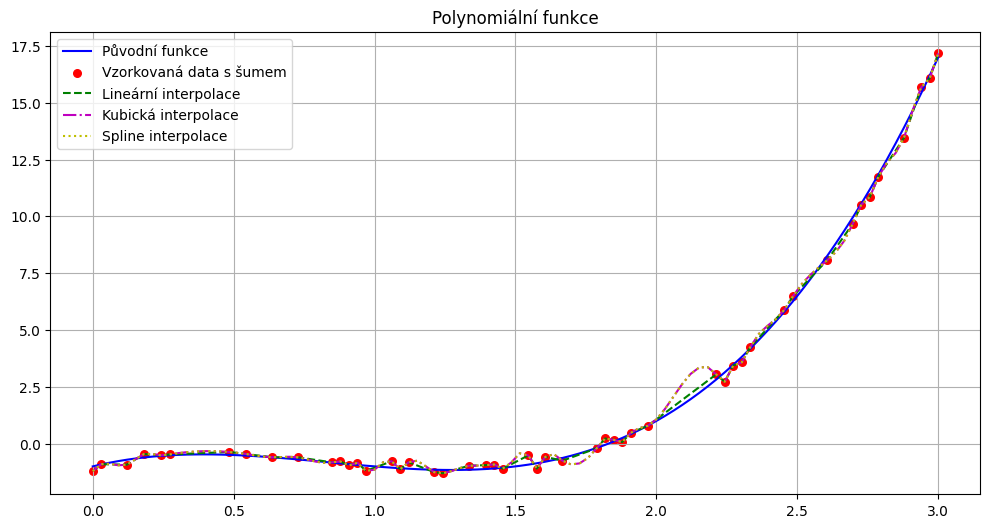

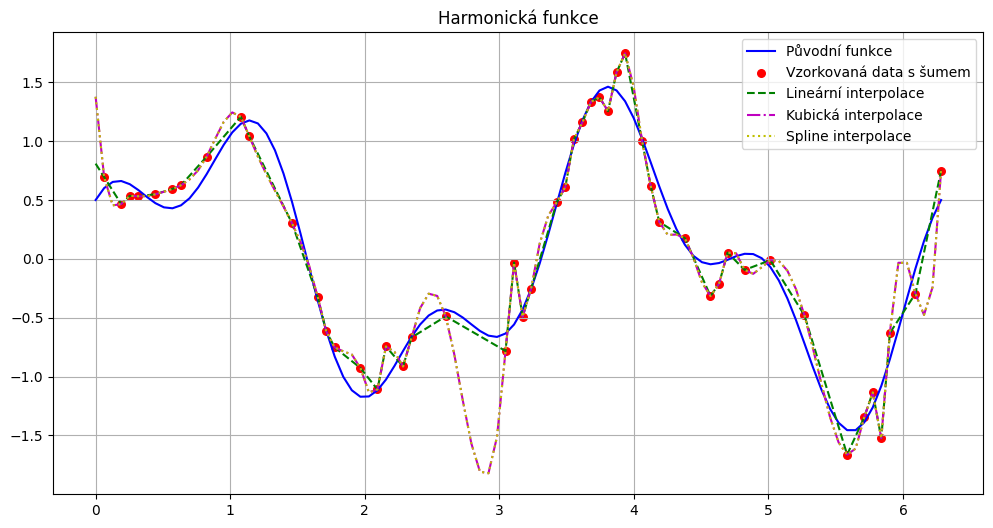

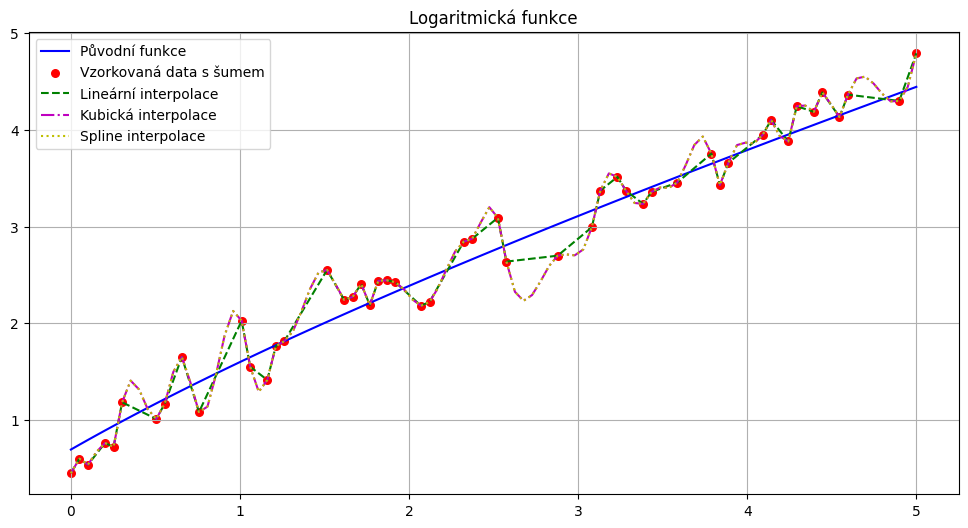

Porovnání přesnosti interpolačních metod (MSE):
Funkce               Lineární        Kubická         Spline         
----------------------------------------------------------------------
Polynomiální funkce  0.026460        0.084038        0.084038       
Harmonická funkce    0.026342        0.100573        0.100573       
Logaritmická funkce  0.038970        0.068963        0.068963       


In [ ]:
# Nastavení parametrů
functions = [
    (polynomial_function, "Polynomiální funkce", [0, 3]),
    (harmonic_function, "Harmonická funkce", [0, 2*np.pi]),
    (logarithmic_function, "Logaritmická funkce", [0, 5])
]

num_points = 100
noise_level = 0.2

# Hlavní část programu - výpočet a vizualizace
results = []

for func, title, x_range in functions:
    # Generování dat
    x_true, y_true, x_sample, y_sample = generate_noisy_data(func, x_range, num_points, noise_level)

    # Interpolace
    y_interp_linear, mse_linear = evaluate_interpolation(x_true, y_true, x_sample, y_sample, 'linear', 'Lineární')
    y_interp_cubic, mse_cubic = evaluate_interpolation(x_true, y_true, x_sample, y_sample, 'cubic', 'Kubická')
    y_interp_spline, mse_spline = evaluate_interpolation(x_true, y_true, x_sample, y_sample, 'spline', 'Spline')

    # Vizualizace
    plot_interpolation(x_true, y_true, x_sample, y_sample, y_interp_linear, y_interp_cubic, y_interp_spline, title)

    # Uložení výsledků
    results.append({
        'funkce': title,
        'mse_linear': mse_linear,
        'mse_cubic': mse_cubic,
        'mse_spline': mse_spline
    })

# Tabulka výsledků MSE
print("Porovnání přesnosti interpolačních metod (MSE):")
print("=" * 70)
print(f"{'Funkce':<20} {'Lineární':<15} {'Kubická':<15} {'Spline':<15}")
print("-" * 70)
for result in results:
    print(f"{result['funkce']:<20} {result['mse_linear']:<15.6f} {result['mse_cubic']:<15.6f} {result['mse_spline']:<15.6f}")
print("=" * 70)